In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
building_df = pd.read_csv("input/ashrae-energy-prediction/building_metadata.csv")
weather_train = pd.read_csv("input/ashrae-energy-prediction/weather_train.csv")
train = pd.read_csv("input/ashrae-energy-prediction/train.csv")

FileNotFoundError: [Errno 2] File b'input/ashrae-energy-prediction/building_metadata.csv' does not exist: b'input/ashrae-energy-prediction/building_metadata.csv'

Features that are likely predictive:

**Buildings**
* primary_use
* square_feet
* year_built
* floor_count (may be too sparse to use)

**Weather**
* time of day
* holiday
* weekend
* cloud_coverage + lags
* dew_temperature + lags
* precip_depth + lags
* sea_level_pressure + lags
* wind_direction + lags
* wind_speed + lags

**Train**
* max, mean, min, std of the specific building historically
* number of meters
* number of buildings at a siteid

In [74]:
building_df

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
5,0,5,Education,8000,2000.0,NaN
6,0,6,Lodging/residential,27926,1981.0,NaN
7,0,7,Education,121074,1989.0,NaN
8,0,8,Education,60809,2003.0,NaN
9,0,9,Office,27000,2010.0,NaN


In [75]:
weather_train

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
5,0,2016-01-01 05:00:00,19.4,NaN,19.4,0.0,NaN,0.0,0.0
6,0,2016-01-01 06:00:00,21.1,6.0,21.1,-1.0,1019.4,0.0,0.0
7,0,2016-01-01 07:00:00,21.1,NaN,21.1,0.0,1018.8,210.0,1.5
8,0,2016-01-01 08:00:00,20.6,NaN,20.0,0.0,1018.1,0.0,0.0
9,0,2016-01-01 09:00:00,21.1,NaN,20.6,0.0,1019.0,290.0,1.5


In [76]:
train

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0000
1,1,0,2016-01-01 00:00:00,0.0000
2,2,0,2016-01-01 00:00:00,0.0000
3,3,0,2016-01-01 00:00:00,0.0000
4,4,0,2016-01-01 00:00:00,0.0000
5,5,0,2016-01-01 00:00:00,0.0000
6,6,0,2016-01-01 00:00:00,0.0000
7,7,0,2016-01-01 00:00:00,0.0000
8,8,0,2016-01-01 00:00:00,0.0000
9,9,0,2016-01-01 00:00:00,0.0000


In [77]:
train = train.merge(building_df, left_on = "building_id", right_on = "building_id", how = "left")

In [78]:
weather_train

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
5,0,2016-01-01 05:00:00,19.4,NaN,19.4,0.0,NaN,0.0,0.0
6,0,2016-01-01 06:00:00,21.1,6.0,21.1,-1.0,1019.4,0.0,0.0
7,0,2016-01-01 07:00:00,21.1,NaN,21.1,0.0,1018.8,210.0,1.5
8,0,2016-01-01 08:00:00,20.6,NaN,20.0,0.0,1018.1,0.0,0.0
9,0,2016-01-01 09:00:00,21.1,NaN,20.6,0.0,1019.0,290.0,1.5


In [79]:
train = train.merge(weather_train, left_on = ["site_id", "timestamp"], right_on = ["site_id", "timestamp"])

In [80]:
del weather_train

In [81]:
train["timestamp"] = pd.to_datetime(train["timestamp"])
train["hour"] = train["timestamp"].dt.hour
train["day"] = train["timestamp"].dt.day
train["weekend"] = train["timestamp"].dt.weekday
train["month"] = train["timestamp"].dt.month

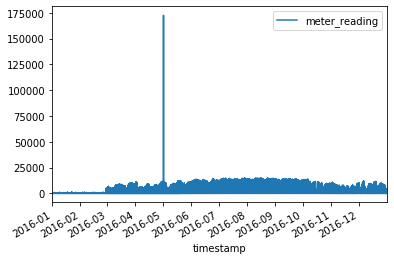

In [82]:
#looks like there may be some errors with some of the readings
train[train["site_id"] == 0].plot("timestamp", "meter_reading")

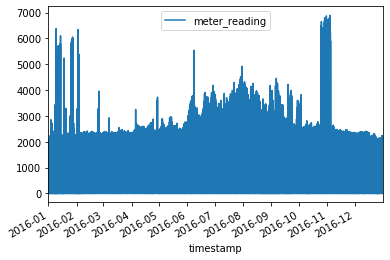

In [83]:
train[train["site_id"] == 2].plot("timestamp", "meter_reading")

In [84]:
train[["hour", "day", "weekend", "month"]]

,hour,day,weekend,month
0,0,1,4,1
1,0,1,4,1
2,0,1,4,1
3,0,1,4,1
4,0,1,4,1
5,0,1,4,1
6,0,1,4,1
7,0,1,4,1
8,0,1,4,1
9,0,1,4,1


In [85]:
train = train.drop("timestamp", axis = 1)

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
le = LabelEncoder()
train["primary_use"] = le.fit_transform(train["primary_use"])

In [88]:
categoricals = ["building_id", "primary_use", "hour", "day", "weekend", "month", "meter"]

In [89]:
train

,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekend,month
0,0,0,0.0000,0,0,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
1,1,0,0.0000,0,0,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
2,2,0,0.0000,0,0,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
3,3,0,0.0000,0,0,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
4,4,0,0.0000,0,0,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
5,5,0,0.0000,0,0,8000,2000.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
6,6,0,0.0000,0,4,27926,1981.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
7,7,0,0.0000,0,0,121074,1989.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
8,8,0,0.0000,0,0,60809,2003.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
9,9,0,0.0000,0,6,27000,2010.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1


In [90]:
drop_cols = ["precip_depth_1_hr", "sea_level_pressure", "wind_direction", "wind_speed"]

In [91]:
numericals = ["square_feet", "year_built", "air_temperature", "cloud_coverage",
              "dew_temperature"]

In [92]:
train[categoricals + numericals]

,building_id,primary_use,hour,day,weekend,month,meter,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature
0,0,0,0,1,4,1,0,7432,2008.0,25.0,6.0,20.0
1,1,0,0,1,4,1,0,2720,2004.0,25.0,6.0,20.0
2,2,0,0,1,4,1,0,5376,1991.0,25.0,6.0,20.0
3,3,0,0,1,4,1,0,23685,2002.0,25.0,6.0,20.0
4,4,0,0,1,4,1,0,116607,1975.0,25.0,6.0,20.0
5,5,0,0,1,4,1,0,8000,2000.0,25.0,6.0,20.0
6,6,4,0,1,4,1,0,27926,1981.0,25.0,6.0,20.0
7,7,0,0,1,4,1,0,121074,1989.0,25.0,6.0,20.0
8,8,0,0,1,4,1,0,60809,2003.0,25.0,6.0,20.0
9,9,6,0,1,4,1,0,27000,2010.0,25.0,6.0,20.0


In [93]:
feat_cols = categoricals + numericals

In [94]:
train["meter_reading"].value_counts()

0.0000       1867887
20.0000        23345
2.9307         23179
36.6000        22138
8.7921         21786
24.4000        21598
5.8614         21309
30.0000        20834
61.0000        20814
10.0000        20671
33.5500        20007
25.0000        19317
4.0000         19159
24.0000        18848
21.3500        18764
27.4500        18741
18.0000        17601
30.5000        16943
100.0000       16423
6.0000         16386
31.0000        15864
27.0000        15619
26.0000        15588
21.0000        15527
36.0000        15495
39.6500        15368
28.0000        15331
2.0000         15323
11.7228        15134
29.0000        14969
              ...   
32.0326            1
16.3639            1
343.9770           1
95.9122            1
6.4977             1
343.6020           1
74.2317            1
285.9960           1
855.4430           1
496.4290           1
59.4353            1
26.2851            1
41.5612            1
286.3790           1
340.3520           1
90.6495            1
467.2450     

In [95]:
#maybe remove some of the high outliers because of sensor error
# train["meter_reading"] = train["meter_reading"].clip(upper = train["meter_reading"].quantile(.999))

In [96]:
#uncomment to plot 100 highest consuming buildings
import matplotlib.pyplot as plt
# top_buildings = train.groupby("building_id")["meter_reading"].mean().sort_values(ascending = False).iloc[:100]
# for value in top_buildings.index:
#     train[train["building_id"] == value]["meter_reading"].rolling(window = 24).mean().plot()
#     plt.show()

In [97]:
target = np.log1p(train["meter_reading"])

In [98]:
del train["meter_reading"] 

In [99]:
train = train.drop(drop_cols + ["site_id", "floor_count"], axis = 1)

In [100]:
train

,building_id,meter,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,hour,day,weekend,month
0,0,0,0,7432,2008.0,25.0,6.0,20.0,0,1,4,1
1,1,0,0,2720,2004.0,25.0,6.0,20.0,0,1,4,1
2,2,0,0,5376,1991.0,25.0,6.0,20.0,0,1,4,1
3,3,0,0,23685,2002.0,25.0,6.0,20.0,0,1,4,1
4,4,0,0,116607,1975.0,25.0,6.0,20.0,0,1,4,1
5,5,0,0,8000,2000.0,25.0,6.0,20.0,0,1,4,1
6,6,0,4,27926,1981.0,25.0,6.0,20.0,0,1,4,1
7,7,0,0,121074,1989.0,25.0,6.0,20.0,0,1,4,1
8,8,0,0,60809,2003.0,25.0,6.0,20.0,0,1,4,1
9,9,0,6,27000,2010.0,25.0,6.0,20.0,0,1,4,1


In [101]:
#Based on this great kernel https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65
def reduce_mem_usage(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in df.columns:
        if df[col].dtype != object:  # Exclude strings            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",df[col].dtype)            
            # make variables for Int, max and min
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()
            print("min for this col: ",mn)
            print("max for this col: ",mx)
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all(): 
                NAlist.append(col)
                df[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)    
            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",df[col].dtype)
            print("******************************")
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return df, NAlist

In [102]:
train, NAlist = reduce_mem_usage(train)

Memory usage of properties dataframe is : 1919.3272590637207  MB
******************************
Column:  building_id
dtype before:  int64
min for this col:  0
max for this col:  1448
dtype after:  uint16
******************************
******************************
Column:  meter
dtype before:  int64
min for this col:  0
max for this col:  3
dtype after:  uint8
******************************
******************************
Column:  primary_use
dtype before:  int32
min for this col:  0
max for this col:  15
dtype after:  uint8
******************************
******************************
Column:  square_feet
dtype before:  int64
min for this col:  283
max for this col:  875000
dtype after:  uint32
******************************
******************************
Column:  year_built
dtype before:  float64
min for this col:  1900.0
max for this col:  2017.0
dtype after:  uint16
******************************
******************************
Column:  air_temperature
dtype before:  float64
min for

In [119]:
# Rob hacking
'''
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from lightgbm import LGBMRegressor

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_pred, (y_true)))

rmsle_scorer = make_scorer(
    lambda y_true, y_pred : np.sqrt(mean_squared_error(y_pred, (y_true))), 
    greater_is_better=False)

lightgbm=LGBMRegressor( task= 'train',
          boosting_type= 'gbdt',
          objective= 'regression',
          metric= 'rmse',
          learning_rate= 0.32,
          feature_fraction= 0.9,
          bagging_fraction= .9,
          bagging_freq= 70,
          verbose= 100)

scores = cross_val_score(lightgbm, train, target, cv=5, 
                         scoring=rmsle_scorer)

print("neg_mean_squared_error scores:\n", scores)
'''

neg_mean_squared_error scores:
 [-1.18685181 -1.25968822 -1.33680315 -1.26186419 -1.34287198]


In [39]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
num_folds = 5
kf = KFold(n_splits = num_folds, shuffle = False, random_state = 42)
error = 0
models = []
for i, (train_index, val_index) in enumerate(kf.split(train)):
    if i + 1 < num_folds:
        continue
    print(train_index.max(), val_index.min())
    train_X = train[feat_cols].iloc[train_index]
    val_X = train[feat_cols].iloc[val_index]
    train_y = target.iloc[train_index]
    val_y = target.iloc[val_index]
    lgb_train = lgb.Dataset(train_X, train_y)
    lgb_eval = lgb.Dataset(val_X, val_y)
    params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'rmse'},
            'learning_rate': 0.1,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.9
            }
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=2000,
                valid_sets=(lgb_train, lgb_eval),
               early_stopping_rounds=20,
               verbose_eval = 20)
#     models.append(gbm)

    y_pred = gbm.predict(val_X, num_iteration=gbm.best_iteration)
    error += np.sqrt(mean_squared_error(y_pred, (val_y)))/num_folds
    print(np.sqrt(mean_squared_error(y_pred, (val_y))))
    break
print(error)

16100483 16100484
Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 1.62091	valid_1's rmse: 1.61146
[40]	training's rmse: 1.47184	valid_1's rmse: 1.46664
[60]	training's rmse: 1.38859	valid_1's rmse: 1.41888
[80]	training's rmse: 1.3398	valid_1's rmse: 1.39988
[100]	training's rmse: 1.29629	valid_1's rmse: 1.39511
[120]	training's rmse: 1.26498	valid_1's rmse: 1.38389
[140]	training's rmse: 1.23471	valid_1's rmse: 1.36683
[160]	training's rmse: 1.20351	valid_1's rmse: 1.34991
[180]	training's rmse: 1.18034	valid_1's rmse: 1.34813
[200]	training's rmse: 1.15904	valid_1's rmse: 1.33696
[220]	training's rmse: 1.14092	valid_1's rmse: 1.32794
[240]	training's rmse: 1.12075	valid_1's rmse: 1.32682
Early stopping, best iteration is:
[226]	training's rmse: 1.13326	valid_1's rmse: 1.32395
1.323948231650565
0.26478964633011304


In [40]:
sorted(zip(gbm.feature_importance(), gbm.feature_name()),reverse = True)

[(2091, 'building_id'),
 (1406, 'square_feet'),
 (925, 'meter'),
 (546, 'primary_use'),
 (512, 'year_built'),
 (505, 'month'),
 (281, 'air_temperature'),
 (194, 'dew_temperature'),
 (153, 'hour'),
 (91, 'day'),
 (62, 'weekend'),
 (14, 'cloud_coverage')]

In [41]:
import gc
del train

In [42]:
del train_X, val_X, lgb_train, lgb_eval, train_y, val_y, y_pred, target

In [43]:
gc.collect()

167

In [44]:
#preparing test data
test = pd.read_csv("../input/ashrae-energy-prediction/test.csv")
# test, NAlist = reduce_mem_usage(test)
test = test.merge(building_df, left_on = "building_id", right_on = "building_id", how = "left")
del building_df
gc.collect()

21

In [45]:
test

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN
5,5,5,0,2017-01-01 00:00:00,0,Education,8000,2000.0,NaN
6,6,6,0,2017-01-01 00:00:00,0,Lodging/residential,27926,1981.0,NaN
7,7,7,0,2017-01-01 00:00:00,0,Education,121074,1989.0,NaN
8,8,7,1,2017-01-01 00:00:00,0,Education,121074,1989.0,NaN
9,9,8,0,2017-01-01 00:00:00,0,Education,60809,2003.0,NaN


In [46]:
test["primary_use"] = le.transform(test["primary_use"])

In [47]:
test, NAlist = reduce_mem_usage(test)

Memory usage of properties dataframe is : 3022.210693359375  MB
******************************
Column:  row_id
dtype before:  int64
min for this col:  0
max for this col:  41697599
dtype after:  uint32
******************************
******************************
Column:  building_id
dtype before:  int64
min for this col:  0
max for this col:  1448
dtype after:  uint16
******************************
******************************
Column:  meter
dtype before:  int64
min for this col:  0
max for this col:  3
dtype after:  uint8
******************************
******************************
Column:  site_id
dtype before:  int64
min for this col:  0
max for this col:  15
dtype after:  uint8
******************************
******************************
Column:  primary_use
dtype before:  int32
min for this col:  0
max for this col:  15
dtype after:  uint8
******************************
******************************
Column:  square_feet
dtype before:  int64
min for this col:  283
max for thi

In [48]:
test

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,0,2017-01-01 00:00:00,0,0,7432,2008,0
1,1,1,0,2017-01-01 00:00:00,0,0,2720,2004,0
2,2,2,0,2017-01-01 00:00:00,0,0,5376,1991,0
3,3,3,0,2017-01-01 00:00:00,0,0,23685,2002,0
4,4,4,0,2017-01-01 00:00:00,0,0,116607,1975,0
5,5,5,0,2017-01-01 00:00:00,0,0,8000,2000,0
6,6,6,0,2017-01-01 00:00:00,0,4,27926,1981,0
7,7,7,0,2017-01-01 00:00:00,0,0,121074,1989,0
8,8,7,1,2017-01-01 00:00:00,0,0,121074,1989,0
9,9,8,0,2017-01-01 00:00:00,0,0,60809,2003,0


In [49]:
gc.collect()

20

In [50]:
weather_test = pd.read_csv("../input/ashrae-energy-prediction/weather_test.csv")
weather_test = weather_test.drop(drop_cols, axis = 1)

In [51]:
weather_test

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature
0,0,2017-01-01 00:00:00,17.8,4.0,11.7
1,0,2017-01-01 01:00:00,17.8,2.0,12.8
2,0,2017-01-01 02:00:00,16.1,0.0,12.8
3,0,2017-01-01 03:00:00,17.2,0.0,13.3
4,0,2017-01-01 04:00:00,16.7,2.0,13.3
5,0,2017-01-01 05:00:00,15.6,2.0,12.8
6,0,2017-01-01 06:00:00,15.0,0.0,12.8
7,0,2017-01-01 07:00:00,15.0,2.0,13.3
8,0,2017-01-01 08:00:00,13.3,0.0,12.2
9,0,2017-01-01 09:00:00,12.2,4.0,11.7


In [52]:
test = test.merge(weather_test, left_on = ["site_id", "timestamp"], right_on = ["site_id", "timestamp"], how = "left")
del weather_test

In [53]:
test["timestamp"] = pd.to_datetime(test["timestamp"])
test["hour"] = test["timestamp"].dt.hour.astype(np.uint8)
test["day"] = test["timestamp"].dt.day.astype(np.uint8)
test["weekend"] = test["timestamp"].dt.weekday.astype(np.uint8)
test["month"] = test["timestamp"].dt.month.astype(np.uint8)
test = test[feat_cols]

In [54]:
from tqdm import tqdm
i=0
res=[]
step_size = 50000
for j in tqdm(range(int(np.ceil(test.shape[0]/50000)))):
    res.append(np.expm1(gbm.predict(test.iloc[i:i+step_size])))
    i+=step_size

100%|████████████████████████████████████████████████████████████████████████████████| 834/834 [02:12<00:00,  4.03it/s]


In [55]:
del test

In [56]:
res = np.concatenate(res)

In [57]:
pd.DataFrame(res).describe()

,0
count,4.169760e+07
mean,2.506398e+02
std,1.600731e+03
min,-9.903579e-01
25%,2.089341e+01
50%,6.346215e+01
75%,1.736629e+02
max,3.216961e+05


In [58]:
res.shape

(41697600,)

In [62]:
sub = pd.read_csv("../input/ashrae-energy-prediction/sample_submission.csv")

In [63]:
sub["meter_reading"] = res

In [64]:
sub.to_csv("submission.csv", index = False)